# 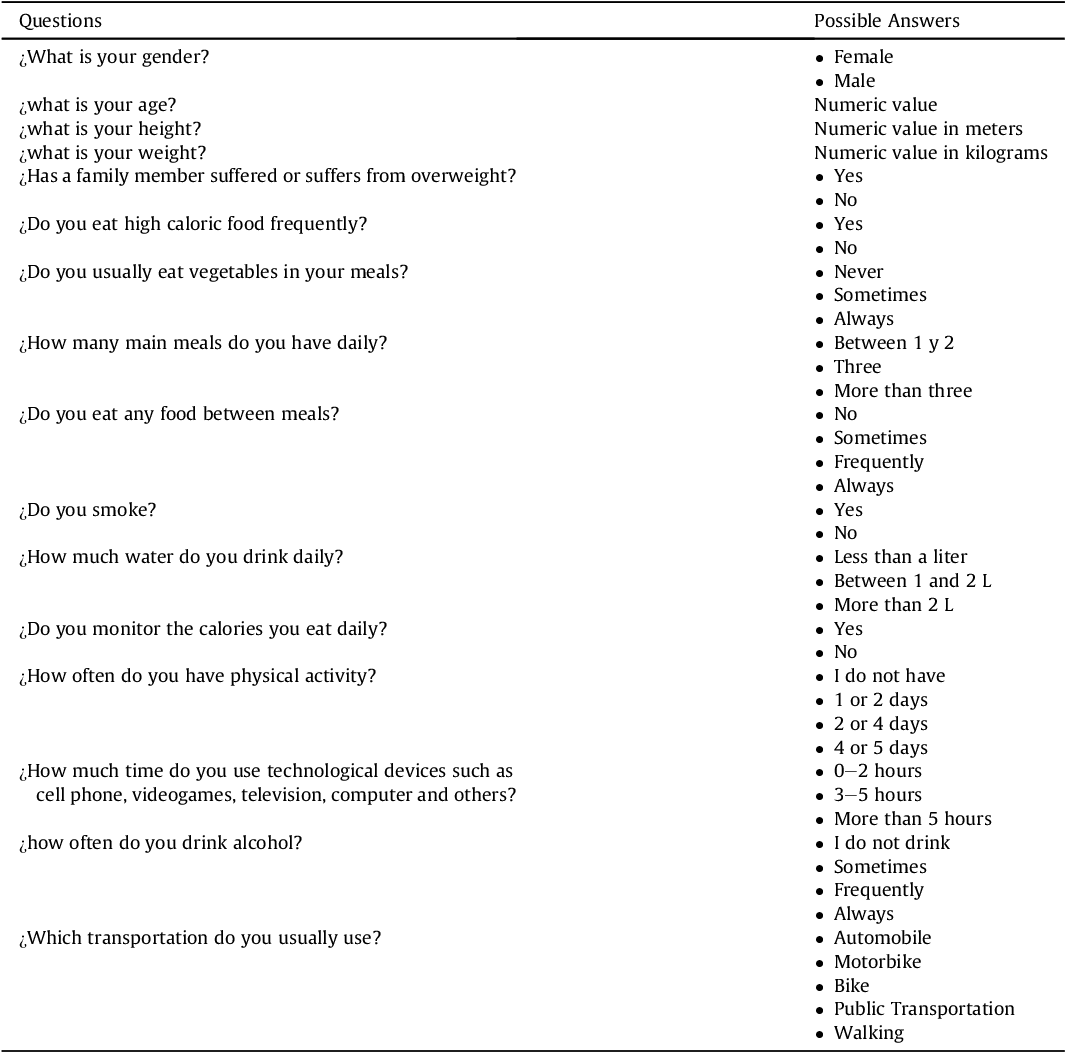ML Project


## Description


The dataset in question is centered around the complex and multifaceted issue of **obesity**, a pressing global health concern. It consists of data collected from **2,111 individuals**, encompassing a wide range of attributes that are potentially linked to obesity. These attributes include demographic information **(such as age and gender)**, physical characteristics **(height and weight)**, lifestyle choices **(dietary habits, physical activity, smoking, and alcohol consumption)**, and personal and family medical history.
which provides a holistic view of the factors that may influence an individual's obesity level.




### Columns & descriptions



*   **Gender**  : Categorical attribute indicating the participant's gender.
*   **Age**  : Continuous attribute representing the participant's age.
*   **Height** : Continuous attribute in meters for the participant's height.
*   **Weight** : Continuous attribute in kilograms for the participant's weight.
*   **family_history_with_overweight** : Categorical (Yes/No) attribute indicating whether there is a family history of overweight.
*   **FAVC** :  Categorical attribute indicating if the participant frequently consumes high caloric food.
*  **FCVC** : Continuous attribute reflecting the frequency of consumption of vegetables.
*  **NCP** : Continuous attribute for the number of main meals.
*  **CAEC** : Categorical attribute indicating the consumption of food between meals. **
* **SMOKE** : Categorical attribute indicating if the participant smokes.
* **CH2O** : Continuous attribute for the daily water consumption.
* **SCC** : Categorical attribute indicating if the participant monitors their calorie intake.
* **FAF** : Continuous attribute for the frequency of physical activity.
* **TUE**: Continuous attribute for time using technology devices.
* **CALC**: Categorical attribute indicating alcohol consumption.
* **MTRANS**: Categorical attribute for the mode of transportation.
* **NObeyesdad**: Categorical attribute indicating the obesity level of the participant.






## Data Validation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading data
path = '/content/drive/MyDrive/Projet ML/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
#checking for missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

No missing values in all columns

In [7]:
#Gender Column Validation
df['Gender'].value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64

1068 Male
1043 Female
we will use one hot encoding ( creating two cols )

In [8]:
df = pd.get_dummies(df, columns=['Gender'])

In [9]:
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Gender_Male
0,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1,0
1,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1,0
2,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0,1
3,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0,1
4,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0,1


In [10]:
#Age Column Validation
print('min age ' ,df['Age'].min())
print('max age ', df['Age'].max())

print('Number of participants for each age ')
df['Age'].value_counts()


min age  14.0
max age  61.0
Number of participants for each age 


18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: Age, Length: 1402, dtype: int64

I noticed that the 'Age' column contained continuous values (e.g., 21.3), indicating very precise ages for each individual. For our case study, having such precise ages is not crucial, so I've decided to use the 'rounding' transformation to adjust these values. This simplification is appropriate for our analysis, as the exact age to the decimal is not expected to significantly impact the prediction of obesity levels.

In [11]:
#Transformation of Age column
df['Age'] = df['Age'].round().astype(int)

In [12]:
df['Age'].unique()

array([21, 23, 27, 22, 29, 24, 26, 41, 30, 52, 20, 19, 31, 39, 17, 25, 55,
       38, 18, 15, 61, 44, 34, 36, 32, 35, 40, 45, 33, 51, 56, 28, 16, 37,
       14, 42, 43, 46, 48, 47])

In [13]:
df['Age'].value_counts()

21    236
23    218
26    213
18    212
19    169
22    163
20    150
24     95
25     82
17     69
31     62
30     53
27     43
33     37
38     34
29     33
34     29
32     26
39     25
37     24
41     20
28     20
16     20
35     19
40     19
44      6
36      6
42      6
55      5
45      3
43      3
46      2
51      2
48      1
61      1
14      1
56      1
15      1
52      1
47      1
Name: Age, dtype: int64

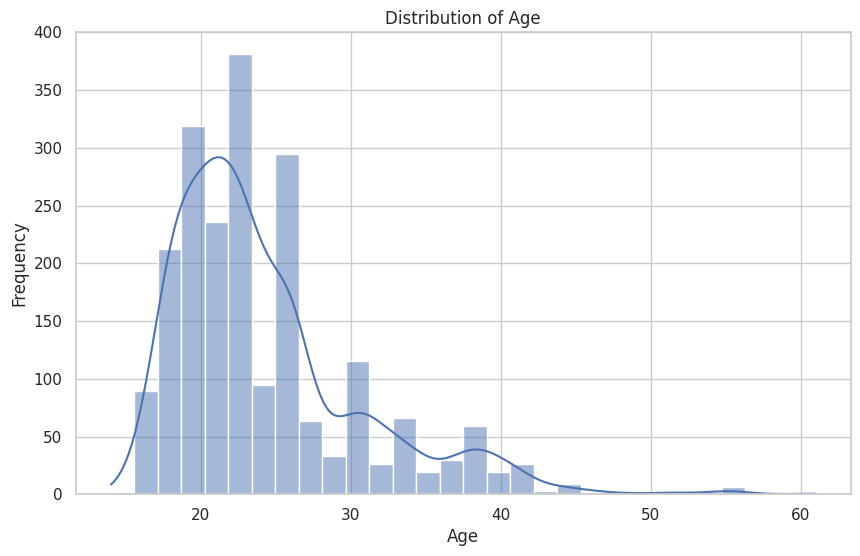

In [14]:
#The distribution of ages
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [15]:
#Height column validation
df['Height'].min()
df['Height'].max()

1.98

In [16]:
df['Height'].nunique()

1574

We have observed that the 'Height' column contains 1,574 unique values out of 2,111 rows, indicating highly precise measurements. Such precision may contribute to overfitting in our machine learning models, as it introduces a level of detail that may not significantly impact the prediction of obesity levels. To mitigate this risk and enhance model generalization, we will reduce the precision of the height values. Rounding these values to a practical level (e.g., to two decimal places) will simplify our dataset, making it more representative of general height measurements and improving the robustness of our analysis

In [17]:
#reducing precision
df['Height'] = df['Height'].round(2)


In [18]:
df['Height'].nunique()

51

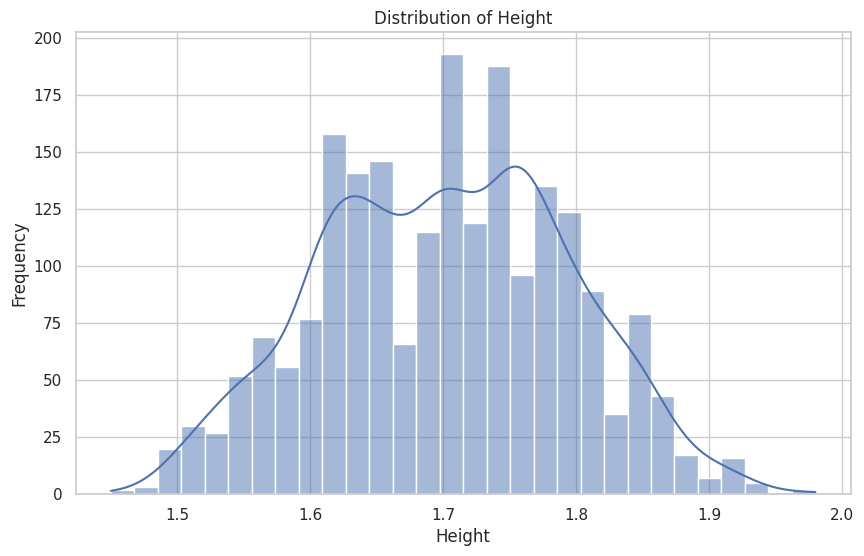

In [19]:
#The distribution of heights
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Height'], bins=30, kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [20]:
#Validation of Weight column
df['Weight'].min()
df['Weight'].max()

173.0

In [21]:
df['Weight'].nunique()

1525

In [22]:
df['Weight'].unique()

array([ 64.      ,  56.      ,  77.      , ..., 133.689352, 133.346641,
       133.472641])

The same note for "weight" column

In [23]:
df['Weight'] = df['Weight'].round(0)

In [24]:
df['Weight'].nunique()

118

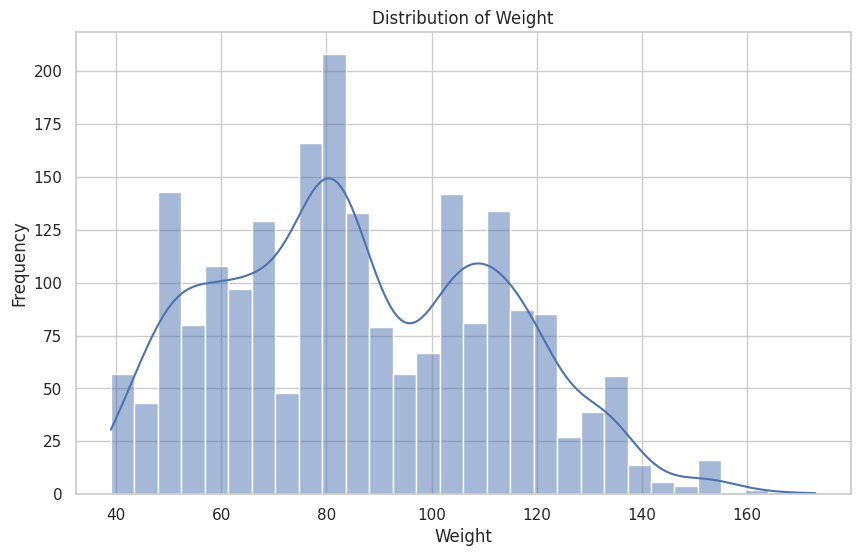

In [25]:
#The distribution of Weights
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight'], bins=30, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Validation of family_history_with_overweight column
df['family_history_with_overweight'].value_counts()

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

In [27]:
#encoding the column  we use label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'family_history_with_overweight' column
df['family_history_with_overweight'] = label_encoder.fit_transform(df['family_history_with_overweight'])

# This will convert 'yes' to 1 and 'no' to 0



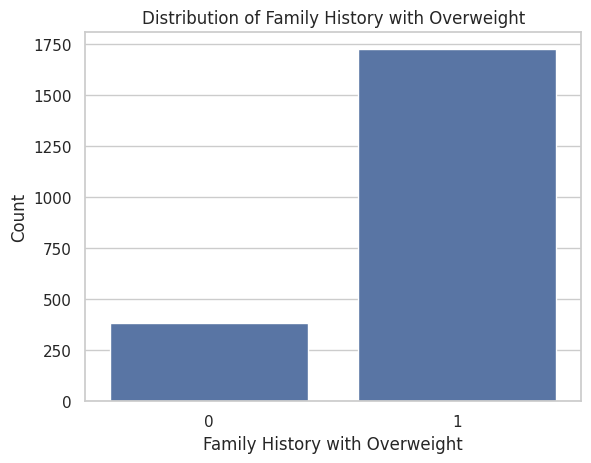

In [29]:
#visualizing the distribution of answers for this column
sns.countplot(data=df, x='family_history_with_overweight')
plt.title('Distribution of Family History with Overweight')
plt.xlabel('Family History with Overweight')
plt.ylabel('Count')
plt.show()

In [30]:
#Validating FAVC column (frequently consumes high caloric food.)
df['FAVC'].value_counts()

yes    1866
no      245
Name: FAVC, dtype: int64

In [31]:
#encoding the column  we use label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'family_history_with_overweight' column
df['FAVC'] = label_encoder.fit_transform(df['FAVC'])

# This will convert 'yes' to 1 and 'no' to 0


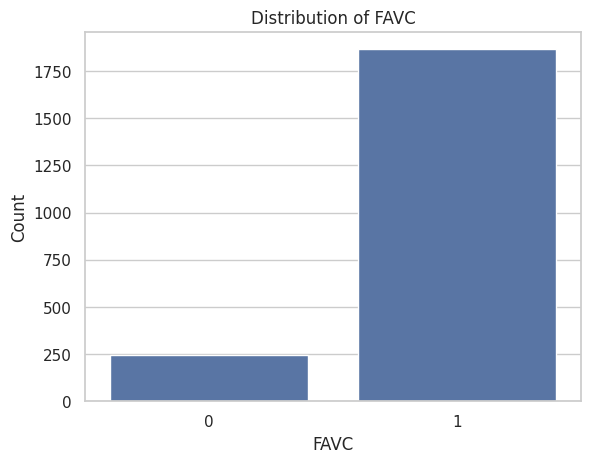

In [32]:
#visualizing the distribution of answers for this column
sns.countplot(data=df, x='FAVC')
plt.title('Distribution of FAVC')
plt.xlabel('FAVC')
plt.ylabel('Count')
plt.show()

In [33]:
#Validation of FCVC (frequency of consumption of vegetables)
df['FCVC'].nunique()

810

In [34]:
df['FCVC'] = df['FCVC'].round().astype(int)


In [35]:
df['FCVC'].nunique()

3

At first we had 810 unique values due to the precision of the data , after rounding it into integers we got 3 unique values which made the column ordinal in this way

levels of vegetable consumption frequency ::

1: Low frequency

2: Medium frequency

3: High frequency


In [36]:
df['FCVC'].value_counts()

2    1013
3     996
1     102
Name: FCVC, dtype: int64

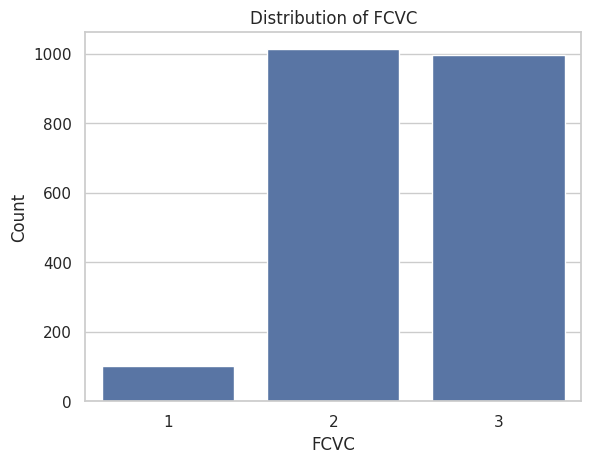

In [37]:
#visualizing the distribution of answers for this column
sns.countplot(data=df, x='FCVC')
plt.title('Distribution of FCVC')
plt.xlabel('FCVC')
plt.ylabel('Count')
plt.show()

In [38]:
# Validation of NCP column (number of meals )
df['NCP'].nunique()


635

The same problem of precision

In [39]:
df['NCP'] = df['NCP'].round().astype(int)

In [40]:
df['NCP'].nunique()

4

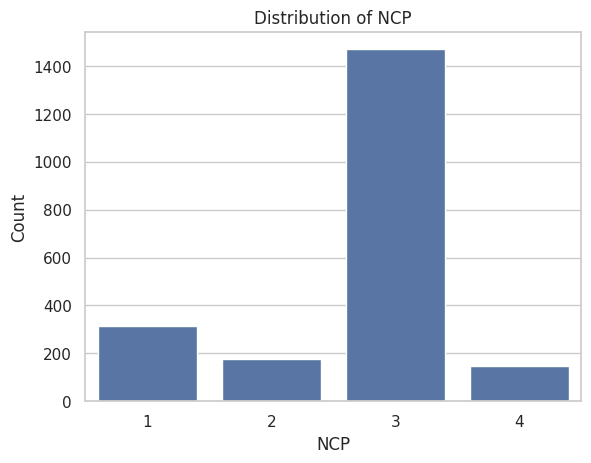

In [41]:
#visualizing the distribution of answers for this column
sns.countplot(data=df, x='NCP')
plt.title('Distribution of NCP')
plt.xlabel('NCP')
plt.ylabel('Count')
plt.show()

In [42]:
#Validation of  CAEC (the consumption of food between meals)
df['CAEC'].nunique()

4

In [43]:
df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

we can encode it to be (using mapping )

0 : no

1 : Sometimes

2 : Frequently

3 : Always

In [44]:
caec_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

# Applying the mapping to the CAEC column
df['CAEC'] = df['CAEC'].replace(caec_mapping)


In [45]:
df['CAEC'].unique()

array([1, 2, 3, 0])

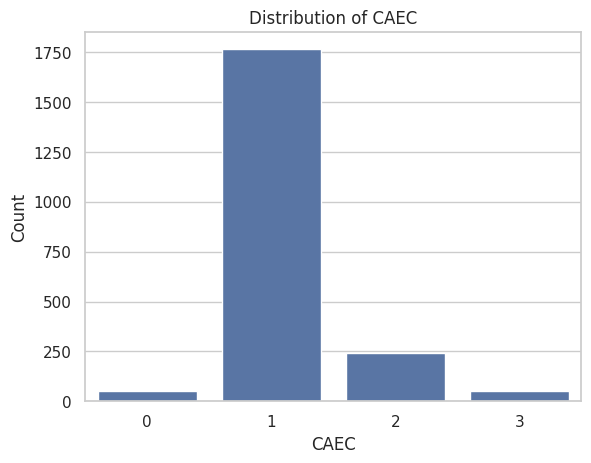

In [46]:
#visualizing the distribution of answers for this column
sns.countplot(data=df, x='CAEC')
plt.title('Distribution of CAEC')
plt.xlabel('CAEC')
plt.ylabel('Count')
plt.show()

In [47]:
#Validation SMOKE column
df['SMOKE'].nunique()

2

In [48]:
#Label Encoding

label_encoder = LabelEncoder()

df['SMOKE'] = label_encoder.fit_transform(df['SMOKE'])


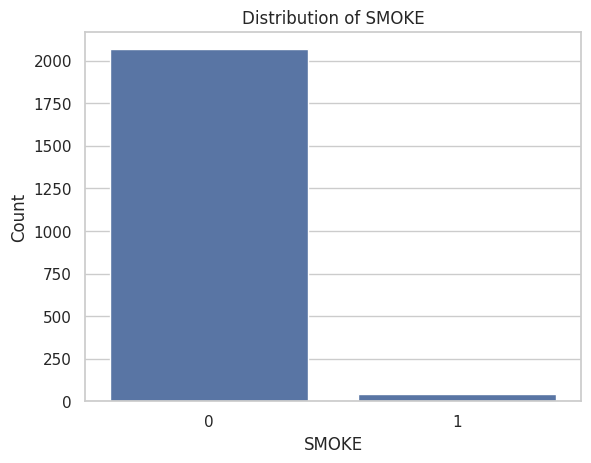

In [49]:
#visualizing the distribution of answers for this column
sns.countplot(data=df, x='SMOKE')
plt.title('Distribution of SMOKE')
plt.xlabel('SMOKE')
plt.ylabel('Count')
plt.show()

In [50]:
#Validation of CH2O  ( daily water consumption Liters per day)
df['CH2O'].nunique()

1268

In [51]:
df['CH2O'].unique()

array([2.      , 3.      , 1.      , ..., 2.054193, 2.852339, 2.863513])

For the daily water consumption variable, we've observed highly precise values that may not be necessary for our analysis. Given the nature of dietary and lifestyle data, a precision to one decimal place is sufficient to capture meaningful differences in water intake without overcomplicating the dataset. Therefore, we will round the daily water consumption values to one decimal place. This adjustment will streamline our data, making it easier to manage and interpret, while still retaining enough detail to analyze variations in water consumption patterns effectively.

In [52]:
df['CH2O'] = df['CH2O'].round(1)

In [53]:
df['CH2O'].nunique()

21

In [54]:
df['CH2O'].unique()

array([2. , 3. , 1. , 1.2, 1.1, 2.7, 2.2, 2.4, 2.8, 2.9, 2.1, 2.6, 1.8,
       1.5, 2.5, 1.3, 1.7, 1.6, 1.9, 2.3, 1.4])

Well , these results are still precised , we will round the values to the nearest 0.5

In [55]:
import numpy as np

# Function to round values to the nearest 0.5
def round_to_nearest_half(x):
    return np.round(x * 2) / 2

# Applying the function to the water consumption column
df['CH2O'] = df['CH2O'].apply(round_to_nearest_half)


In [56]:
df['CH2O'].unique()

array([2. , 3. , 1. , 2.5, 1.5])

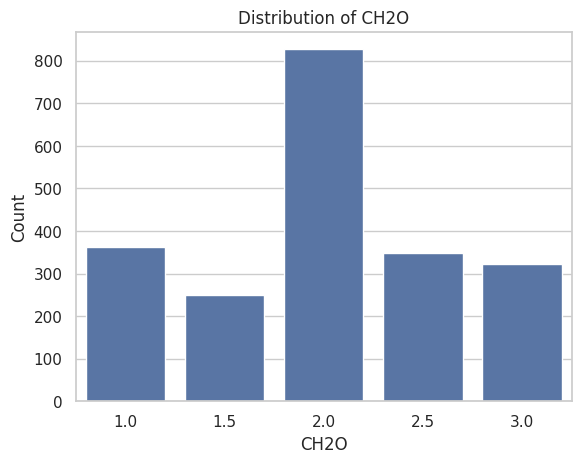

In [57]:
#visualizing the distribution of answers for this column
sns.countplot(data=df, x='CH2O')
plt.title('Distribution of CH2O')
plt.xlabel('CH2O')
plt.ylabel('Count')
plt.show()

In [58]:
#Validation SCC : ( yes if the participant monitors their calorie intake )
df['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [59]:
#Label Encoding

label_encoder = LabelEncoder()

df['SCC'] = label_encoder.fit_transform(df['SCC'])



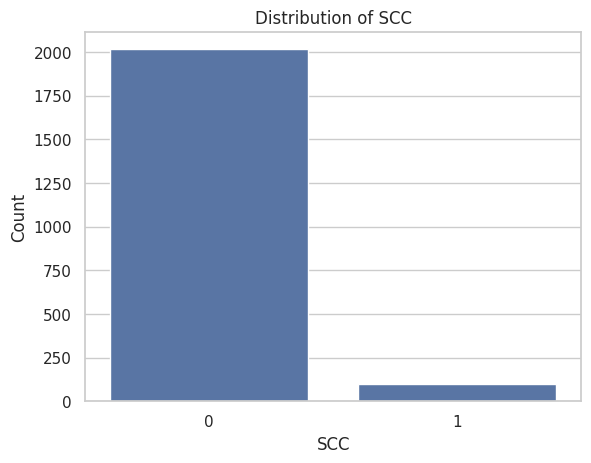

In [60]:
#visualizing the distribution of answers for this column
sns.countplot(data=df, x='SCC')
plt.title('Distribution of SCC')
plt.xlabel('SCC')
plt.ylabel('Count')
plt.show()

In [61]:
#Validation of FAF ( the frequency of physical activity  "HOW MANY DAYS A WEEK ")
df['FAF'].nunique()

1190

In [62]:
df['FAF'].unique()

array([0.      , 3.      , 2.      , ..., 1.414209, 1.139107, 1.026452])

PROBLEM OF PRECISION  : in case we mean by frequency the number of hours per week , one decimal number will be enough segnificant

In [63]:
df['FAF'] = df['FAF'].round().astype(int)


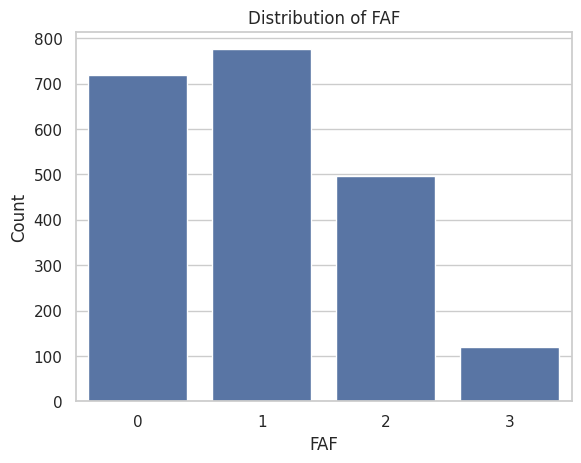

In [64]:
#visualizing the distribution of answers for this column
sns.countplot(data=df, x='FAF')
plt.title('Distribution of FAF')
plt.xlabel('FAF')
plt.ylabel('Count')
plt.show()

In [65]:
#Validation of  TUE (time using technology devices "HOW MANY HOURS A DAY ")
df['TUE'].nunique()

1129

For the variable representing time spent using technology devices, precision beyond 1-hour increments is not necessary, given our analysis goals. The current data, with 1,129 unique values due to high precision, can be simplified by rounding to the nearest whole hour. This level of detail is sufficient to capture meaningful differences in tech device usage while making the dataset more manageable and the results more interpretable

In [66]:
df['TUE'] = df['TUE'].round().astype(int)

In [67]:
df['TUE'].nunique()

3

In [68]:
df['TUE'].unique()

array([1, 0, 2])

In [69]:
#Validation of CALC
df['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [70]:
#Encoding using mapping
calc_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

# Applying the mapping to the CAEC column
df['CALC'] = df['CALC'].replace(calc_mapping)

In [71]:
df['CALC'].unique()

array([0, 1, 2, 3])

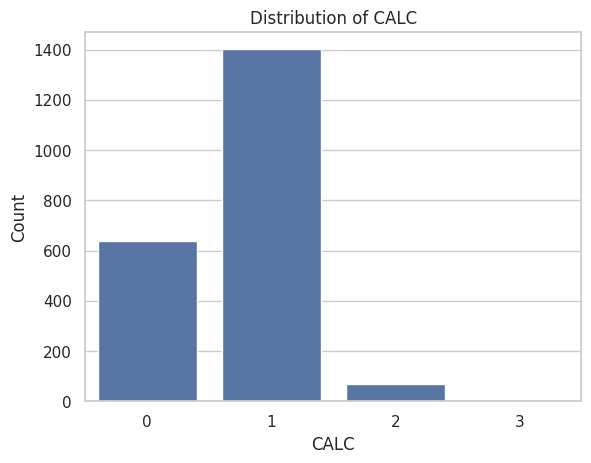

In [72]:
#visualizing the distribution of answers for this column
sns.countplot(data=df, x='CALC')
plt.title('Distribution of CALC')
plt.xlabel('CALC')
plt.ylabel('Count')
plt.show()

In [73]:
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Gender_Male
0,21,1.62,64.0,1,0,2,3,1,0,2.0,0,0,1,0,Public_Transportation,Normal_Weight,1,0
1,21,1.52,56.0,1,0,3,3,1,1,3.0,1,3,0,1,Public_Transportation,Normal_Weight,1,0
2,23,1.80,77.0,1,0,2,3,1,0,2.0,0,2,1,2,Public_Transportation,Normal_Weight,0,1
3,27,1.80,87.0,0,0,3,3,1,0,2.0,0,2,0,2,Walking,Overweight_Level_I,0,1
4,22,1.78,90.0,0,0,2,1,1,0,2.0,0,0,0,1,Public_Transportation,Overweight_Level_II,0,1


In [74]:
#Validation of MTRANS (Preferred mode of transportation: Categorical (Automobile/Motorbike/Bike/Public Transportation/Walking))
df['MTRANS'].value_counts()


Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

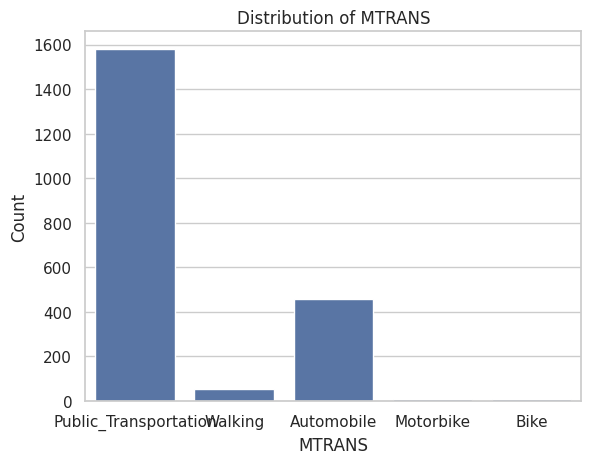

In [75]:
#visualizing the distribution of answers for this column
sns.countplot(data=df, x='MTRANS')
plt.title('Distribution of MTRANS')
plt.xlabel('MTRANS')
plt.ylabel('Count')
plt.show()

In [76]:
#One hot encoding
df = pd.get_dummies(df, columns=['MTRANS'])


In [77]:
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,TUE,CALC,NObeyesdad,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,1.62,64.0,1,0,2,3,1,0,2.0,...,1,0,Normal_Weight,1,0,0,0,0,1,0
1,21,1.52,56.0,1,0,3,3,1,1,3.0,...,0,1,Normal_Weight,1,0,0,0,0,1,0
2,23,1.80,77.0,1,0,2,3,1,0,2.0,...,1,2,Normal_Weight,0,1,0,0,0,1,0
3,27,1.80,87.0,0,0,3,3,1,0,2.0,...,0,2,Overweight_Level_I,0,1,0,0,0,0,1
4,22,1.78,90.0,0,0,2,1,1,0,2.0,...,0,1,Overweight_Level_II,0,1,0,0,0,1,0


In [78]:
#Validation of "NObeyesdad"
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [79]:
# Mapping for the 'NObeyesdad' column to convert categories to ordinal numbers based on the provided order
obesity_mapping = {
    'Normal_Weight': 0,
    'Overweight_Level_I': 1,
    'Overweight_Level_II': 2,
    'Obesity_Type_I': 3,
    'Obesity_Type_II': 4,
    'Obesity_Type_III': 5
}

# Applying the mapping to the 'NObeyesdad' column
df['NObeyesdad'] = df['NObeyesdad'].map(obesity_mapping)



In [80]:
# Replace missing values with a specific value (e.g., -1)
df['NObeyesdad'].fillna(-1, inplace=True)

# Convert the column to integer type
df['NObeyesdad'] = df['NObeyesdad'].astype(int)


In [81]:
df.drop(df[df['NObeyesdad'] == -1].index, inplace=True)


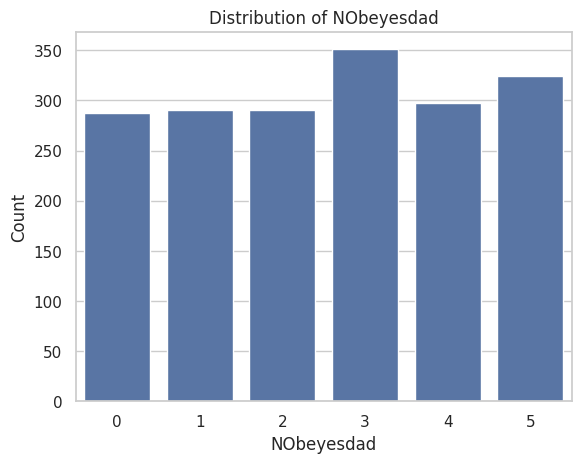

In [82]:
#visualizing the distribution of answers for this column
sns.countplot(data=df, x='NObeyesdad')
plt.title('Distribution of NObeyesdad')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.show()

In [83]:
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,TUE,CALC,NObeyesdad,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,1.62,64.0,1,0,2,3,1,0,2.0,...,1,0,0,1,0,0,0,0,1,0
1,21,1.52,56.0,1,0,3,3,1,1,3.0,...,0,1,0,1,0,0,0,0,1,0
2,23,1.80,77.0,1,0,2,3,1,0,2.0,...,1,2,0,0,1,0,0,0,1,0
3,27,1.80,87.0,0,0,3,3,1,0,2.0,...,0,2,1,0,1,0,0,0,0,1
4,22,1.78,90.0,0,0,2,1,1,0,2.0,...,0,1,2,0,1,0,0,0,1,0


In [84]:
new_file_path = '/content/drive/MyDrive/Projet ML/Modified_ObesityDataset_.csv'
df.to_csv(new_file_path, index=False)